In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [277]:
class Color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

### Cell by cell demo

In [2]:
m = 5
f = 7
l = 10
data = np.arange(m * f * l) + 1
#data = data.reshape(-1, 2, 3)
data = data.reshape(m, f, l)
w = 4
g = 2
n_outputs = 2
drop_remainder = False

total_size = w + g + n_outputs
data.shape, total_size

((5, 7, 10), 8)

In [72]:
# Treat even splits
start_indices = np.arange(0, l - w - n_outputs, s)

# Start indices, end indices, start target indices, end target indices
start_indices, \
start_indices + w, \
start_indices + w + g, \
start_indices + w + g + n_outputs

(array([0, 2]), array([4, 6]), array([6, 8]), array([ 8, 10]))

In [73]:
# Treat remainder split
# Remainder split starts at, total length of time series, minus, total_size
# Note that the remainder start index is always greater than last start index (at least 1 step). When even both index
# are equal, the split is even.
if l % total_size != 0:
    remainder_start_index = l - total_size
    start_indices = np.append(start_indices, remainder_start_index)
    print(remainder_start_index, remainder_start_index + total_size)

2 10


In [455]:
print("Final indices")
# Start indices, end indices, start target indices, end target indices
start_indices, \
start_indices + w, \
start_indices + w + g, \
start_indices + w + g + n_outputs

Final indices


(array([0, 2, 3]), array([4, 6, 7]), array([5, 7, 8]), array([ 7,  9, 10]))

In [456]:
data.shape, data

((5, 7, 10),
 array([[[  1,   2,   3,   4,   5,   6,   7,   8,   9,  10],
         [ 11,  12,  13,  14,  15,  16,  17,  18,  19,  20],
         [ 21,  22,  23,  24,  25,  26,  27,  28,  29,  30],
         [ 31,  32,  33,  34,  35,  36,  37,  38,  39,  40],
         [ 41,  42,  43,  44,  45,  46,  47,  48,  49,  50],
         [ 51,  52,  53,  54,  55,  56,  57,  58,  59,  60],
         [ 61,  62,  63,  64,  65,  66,  67,  68,  69,  70]],
 
        [[ 71,  72,  73,  74,  75,  76,  77,  78,  79,  80],
         [ 81,  82,  83,  84,  85,  86,  87,  88,  89,  90],
         [ 91,  92,  93,  94,  95,  96,  97,  98,  99, 100],
         [101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
         [111, 112, 113, 114, 115, 116, 117, 118, 119, 120],
         [121, 122, 123, 124, 125, 126, 127, 128, 129, 130],
         [131, 132, 133, 134, 135, 136, 137, 138, 139, 140]],
 
        [[141, 142, 143, 144, 145, 146, 147, 148, 149, 150],
         [151, 152, 153, 154, 155, 156, 157, 158, 159, 160],
     

Review batch 0, feature 0

In [458]:
look_out_batch = 0
look_out_feature = 0
print(f"Window of {w}")
split1 = data[..., slice(0, 4)]
split2 = data[..., slice(2, 6)]

split1.shape, split2.shape, split1, split2

Window of 4


((5, 7, 4),
 (5, 7, 4),
 array([[[  1,   2,   3,   4],
         [ 11,  12,  13,  14],
         [ 21,  22,  23,  24],
         [ 31,  32,  33,  34],
         [ 41,  42,  43,  44],
         [ 51,  52,  53,  54],
         [ 61,  62,  63,  64]],
 
        [[ 71,  72,  73,  74],
         [ 81,  82,  83,  84],
         [ 91,  92,  93,  94],
         [101, 102, 103, 104],
         [111, 112, 113, 114],
         [121, 122, 123, 124],
         [131, 132, 133, 134]],
 
        [[141, 142, 143, 144],
         [151, 152, 153, 154],
         [161, 162, 163, 164],
         [171, 172, 173, 174],
         [181, 182, 183, 184],
         [191, 192, 193, 194],
         [201, 202, 203, 204]],
 
        [[211, 212, 213, 214],
         [221, 222, 223, 224],
         [231, 232, 233, 234],
         [241, 242, 243, 244],
         [251, 252, 253, 254],
         [261, 262, 263, 264],
         [271, 272, 273, 274]],
 
        [[281, 282, 283, 284],
         [291, 292, 293, 294],
         [301, 302, 303, 304],
   

In [459]:
np.stack([split1, split2], axis=2)

array([[[[  1,   2,   3,   4],
         [  3,   4,   5,   6]],

        [[ 11,  12,  13,  14],
         [ 13,  14,  15,  16]],

        [[ 21,  22,  23,  24],
         [ 23,  24,  25,  26]],

        [[ 31,  32,  33,  34],
         [ 33,  34,  35,  36]],

        [[ 41,  42,  43,  44],
         [ 43,  44,  45,  46]],

        [[ 51,  52,  53,  54],
         [ 53,  54,  55,  56]],

        [[ 61,  62,  63,  64],
         [ 63,  64,  65,  66]]],


       [[[ 71,  72,  73,  74],
         [ 73,  74,  75,  76]],

        [[ 81,  82,  83,  84],
         [ 83,  84,  85,  86]],

        [[ 91,  92,  93,  94],
         [ 93,  94,  95,  96]],

        [[101, 102, 103, 104],
         [103, 104, 105, 106]],

        [[111, 112, 113, 114],
         [113, 114, 115, 116]],

        [[121, 122, 123, 124],
         [123, 124, 125, 126]],

        [[131, 132, 133, 134],
         [133, 134, 135, 136]]],


       [[[141, 142, 143, 144],
         [143, 144, 145, 146]],

        [[151, 152, 153, 154],
     

Review batch 1, feature 0

In [460]:
look_out_batch = 1
look_out_feature = 0
print(f"Window of {w}")
target1 = data[..., slice(5, 7)]
target2 = data[..., slice(7, 9)]

target1.shape, target2.shape, target1, target2

Window of 4


((5, 7, 2),
 (5, 7, 2),
 array([[[  6,   7],
         [ 16,  17],
         [ 26,  27],
         [ 36,  37],
         [ 46,  47],
         [ 56,  57],
         [ 66,  67]],
 
        [[ 76,  77],
         [ 86,  87],
         [ 96,  97],
         [106, 107],
         [116, 117],
         [126, 127],
         [136, 137]],
 
        [[146, 147],
         [156, 157],
         [166, 167],
         [176, 177],
         [186, 187],
         [196, 197],
         [206, 207]],
 
        [[216, 217],
         [226, 227],
         [236, 237],
         [246, 247],
         [256, 257],
         [266, 267],
         [276, 277]],
 
        [[286, 287],
         [296, 297],
         [306, 307],
         [316, 317],
         [326, 327],
         [336, 337],
         [346, 347]]]),
 array([[[  8,   9],
         [ 18,  19],
         [ 28,  29],
         [ 38,  39],
         [ 48,  49],
         [ 58,  59],
         [ 68,  69]],
 
        [[ 78,  79],
         [ 88,  89],
         [ 98,  99],
         [108

Review batch 1, feature 0

In [461]:
look_out_batch = 1
look_out_feature = 0
print(f"Window of {w}")

data[look_out_batch, look_out_feature, slice(2, 6)], data[look_out_batch, look_out_feature, slice(7, 9)]

Window of 4


(array([73, 74, 75, 76]), array([78, 79]))

Review batch 1, feature 1

In [462]:
look_out_batch = 1
look_out_feature = 1
print(f"Window of {w}")

data[look_out_batch, look_out_feature, slice(2, 6)], data[look_out_batch, look_out_feature, slice(7, 9)]

Window of 4


(array([83, 84, 85, 86]), array([88, 89]))

In [468]:
X = np.stack([data[..., slice(start, end)] for start, end in zip(start_indices, start_indices + w)], 
             axis=2)
X = np.transpose(X, axes=(0, 2, 1, 3))
y = np.stack([data[..., slice(start, end)] for start, end in zip(start_indices + w + g, start_indices + w + g + n_outputs)], 
             axis=2)
y = np.transpose(y, axes=(0, 2, 1, 3))

In [469]:
m, f, l

(5, 7, 10)

In [472]:
print("batch, features, stack of splits, window length")
a = 0
X[a].shape, X[a]

batch, features, stack of splits, window length


((3, 7, 4),
 array([[[ 1,  2,  3,  4],
         [11, 12, 13, 14],
         [21, 22, 23, 24],
         [31, 32, 33, 34],
         [41, 42, 43, 44],
         [51, 52, 53, 54],
         [61, 62, 63, 64]],
 
        [[ 3,  4,  5,  6],
         [13, 14, 15, 16],
         [23, 24, 25, 26],
         [33, 34, 35, 36],
         [43, 44, 45, 46],
         [53, 54, 55, 56],
         [63, 64, 65, 66]],
 
        [[ 4,  5,  6,  7],
         [14, 15, 16, 17],
         [24, 25, 26, 27],
         [34, 35, 36, 37],
         [44, 45, 46, 47],
         [54, 55, 56, 57],
         [64, 65, 66, 67]]]))

In [434]:
f, w

(4, 4)

In [433]:
X.reshape(-1, f, w)

ValueError: cannot reshape array of size 120 into shape (4,4)

In [431]:
y.shape, y

((5, 2, 3, 2),
 array([[[[  6,   7],
          [  8,   9],
          [  9,  10]],
 
         [[ 16,  17],
          [ 18,  19],
          [ 19,  20]]],
 
 
        [[[ 26,  27],
          [ 28,  29],
          [ 29,  30]],
 
         [[ 36,  37],
          [ 38,  39],
          [ 39,  40]]],
 
 
        [[[ 46,  47],
          [ 48,  49],
          [ 49,  50]],
 
         [[ 56,  57],
          [ 58,  59],
          [ 59,  60]]],
 
 
        [[[ 66,  67],
          [ 68,  69],
          [ 69,  70]],
 
         [[ 76,  77],
          [ 78,  79],
          [ 79,  80]]],
 
 
        [[[ 86,  87],
          [ 88,  89],
          [ 89,  90]],
 
         [[ 96,  97],
          [ 98,  99],
          [ 99, 100]]]]))

In [283]:
w, g, n_outputs

(3, 2, 3)

In [284]:
total_sizes = range(1, 20 + 1)
ls = range(5, 20 + 1)
for l in ls:
    
    for total_size in total_sizes:
        print(f"l = {l}, total_size = {total_size}")
        if total_size >= 1 and l >= total_size:
            # For number of splits
            splits = l - total_size + 1
            last_start_idx = len(range(splits))
            for x in range(l):#range(splits):
                if x < last_start_idx:
                    print(Color.BOLD + str(x) + Color.END, end=", ")
                else:
                    print(str(x), end=", ")
            print("nb splits:", splits, end="\n")
        print()

l = 5, total_size = 1
0, 1, 2, 3, 4, nb splits: 5

l = 5, total_size = 2
0, 1, 2, 3, 4, nb splits: 4

l = 5, total_size = 3
0, 1, 2, 3, 4, nb splits: 3

l = 5, total_size = 4
0, 1, 2, 3, 4, nb splits: 2

l = 5, total_size = 5
0, 1, 2, 3, 4, nb splits: 1

l = 5, total_size = 6

l = 5, total_size = 7

l = 5, total_size = 8

l = 5, total_size = 9

l = 5, total_size = 10

l = 5, total_size = 11

l = 5, total_size = 12

l = 5, total_size = 13

l = 5, total_size = 14

l = 5, total_size = 15

l = 5, total_size = 16

l = 5, total_size = 17

l = 5, total_size = 18

l = 5, total_size = 19

l = 5, total_size = 20

l = 6, total_size = 1
0, 1, 2, 3, 4, 5, nb splits: 6

l = 6, total_size = 2
0, 1, 2, 3, 4, 5, nb splits: 5

l = 6, total_size = 3
0, 1, 2, 3, 4, 5, nb splits: 4

l = 6, total_size = 4
0, 1, 2, 3, 4, 5, nb splits: 3

l = 6, total_size = 5
0, 1, 2, 3, 4, 5, nb splits: 2

l = 6, total_size = 6
0, 1, 2, 3, 4, 5, nb splits: 1

l = 6, total_size = 7

l = 6, total_size = 8

l = 6, total_size =

In [437]:
# define Python user-defined exceptions
class InputError(Exception):
    "Raised when error in inputs"
    pass

class TSWindow():
    def __init__(self, 
                 input_size=1, 
                 gap=0, 
                 label_size=1,
                ):
        if not isinstance(input_size, int):
            raise Exception("Input error. Dtype not expected on \x1B[3m input_size \x1B[0m. It should be int.")
        elif input_size < 1:
            raise Exception("Input error. \x1B[3m input_size \x1B[0m must be 1 at least.")
        self.input_size = input_size
        self.gap = gap
        self.label_size = label_size
        self.total_size = self.input_size + self.gap + self.label_size
    def _window_dataset(self, data):
        _, _, self.length = data.shape
        if self.input_size < 1 or self.total_size > self.length:
            raise Exception("Input error. Length of time series must be equal to \x1B[3m input_size \x1B[0m at least.")
        # Treat even splits
        self.start_indices = np.arange(0, self.length - self.total_size + 1, 1)
        self.n_splits = len(self.start_indices)
        # Treat remainder split
        # Remainder split starts at, total length of time series, minus, total_size
        # Note that the remainder start index is always greater than last start index (at least 1 step). When even both index
        # are equal, the split is even.
        print(self.length, self.total_size, self.length % self.total_size != 0)
        print(self.start_indices)
        self.show_index()
        x_stack = []
        y_stack = []
        for start in self.start_indices:
            x_stack.append(data[..., slice(start, start + self.input_size)])
            y_stack.append(data[..., slice(start + self.input_size + self.gap, start + self.total_size)])
        #print(x_stack)
        #print(y_stack)
        X = np.transpose(np.stack(x_stack, axis=2), axes=(0, 2, 1, 3))
        y = np.transpose(np.stack(y_stack, axis=2), axes=(0, 2, 1, 3))
        return X, y
    def extract_sets(self, data, splits_into_batch=True, return_indices=False):
        """ Desc: 
            Input:
                - self. General object
                - X, numpy array (row, col), array of time series
            Output:
                - data , numpy array, array of data without target
                - target, numpy array, array of target values
        """
        if self.label_size == 0:
            raise Exception("Target setup error: No target points assigned")
        X_window, y_window = self._window_dataset(data)
        if splits_into_batch:
            # Transpose batches and splits in order to stack splits properly
            m, s, *other_dims = X_window.shape
            
            X_window = X_window.reshape(s * m, *other_dims)
            y_window = y_window.reshape(s * m, *y_window.shape[2:])
        if return_indices:
            return X_window, y_window, self.start_indices
        return X_window, y_window, None
    def show_index(self):
        print("Input start:", self.start_indices)
        print("Input end:", self.start_indices + self.input_size)
        print("Label start:", self.start_indices + self.input_size + self.gap)
        print("Label end:", self.start_indices + self.input_size + self.gap + self.label_size)
    
    def plot_splits(self, 
                    data,
                    data_win, 
                    labels, 
                    batch=0, 
                    feature=0, 
                    figsize=(12, 6),
                   ):
        # Full data plot parameters
        linestyle_full_data = "-."
        marker_full_data = "o"
        size_full_data = 25
        # Split data plot parameters
        linestyle_split_data = "--"
        marker_split_data = "*"
        # Target plot parameters
        size = 100
        alpha = 0.6
        target_marker = "o"
        target_facecolor = "red"
        target_edgecolor = "black"
        
        sample_data = data[batch, feature]
        sample_data_splits = data_win[batch, :, feature]
        sample_labels_split = labels[batch, :, feature]
        
        n_splits = len(sample_ts_splits)
        if n_splits % 5 == 0:
            axes_rows, axes_cols = n_splits // 5, 5
        elif n_splits % 4 == 0:
            axes_rows, axes_cols = n_splits // 4, 4
        elif n_splits % 3 == 0:
            axes_rows, axes_cols = n_splits // 3, 3
        elif n_splits % 2 == 0:
            axes_rows, axes_cols = n_splits // 2, 2
        else:
            axes_rows, axes_cols = n_splits, 1
        plt.figure(figsize=figsize)
        
        for i, (sample_data_split, index) in enumerate(zip(sample_data_splits, self.start_indices)):
            print("Split:", i + 1)
            
            # Next target points
            x_data = np.arange(index, index + w)
            x_labels = np.arange(index + w + self.gap, index + self.input_size + self.gap + self.label_size)
            labels_split = sample_labels_split[i]
            
            print("Indices:", x_data, x_labels, ". Data:", sample_data_split, labels_split)
            
            plt.subplot(axes_rows, axes_cols, i + 1)
            # Plot full time serie
            plt.plot(sample_data, 
                     color="black", 
                     marker=marker_full_data,
                     linestyle=linestyle_full_data, 
                     label="Full serie"
                    )
            # Plot split time serie
            plt.plot(x_data, 
                     sample_data_split,
                     marker=marker_split_data, 
                     linestyle=linestyle_split_data,
                     label=f"Split {i + 1}"
                    )
            # Plot label points
            plt.scatter(x_labels,
                        labels_split, 
                        marker=target_marker, 
                        alpha=alpha, 
                        s=size, 
                        facecolor=target_facecolor, 
                        edgecolor=target_edgecolor
                       )
        plt.legend()

## Test 1
Test with sequence of integer values for convinience

In [438]:
m, f, l = 6, 4, 10

X = np.arange(m * f * l).reshape(m, f, l)
print(f"Examples {m}, features {f}, length: {l}")

Examples 6, features 4, length: 10


Window of 5 points and output of 2

In [344]:
w_size = 4
n_targets = 2
g = 0
ts_windower = TSWindow(w_size, gap=g, label_size=n_targets)

X_win, y_win = ts_windower._window_dataset(X)
X_win.shape, X_win

False 10 6 True
[0 1 2 3 4]
Input start: [0 1 2 3 4]
Input end: [4 5 6 7 8]
Label start: [4 5 6 7 8]
Label end: [ 6  7  8  9 10]


((6, 5, 4, 4),
 array([[[[  0,   1,   2,   3],
          [ 10,  11,  12,  13],
          [ 20,  21,  22,  23],
          [ 30,  31,  32,  33]],
 
         [[  1,   2,   3,   4],
          [ 11,  12,  13,  14],
          [ 21,  22,  23,  24],
          [ 31,  32,  33,  34]],
 
         [[  2,   3,   4,   5],
          [ 12,  13,  14,  15],
          [ 22,  23,  24,  25],
          [ 32,  33,  34,  35]],
 
         [[  3,   4,   5,   6],
          [ 13,  14,  15,  16],
          [ 23,  24,  25,  26],
          [ 33,  34,  35,  36]],
 
         [[  4,   5,   6,   7],
          [ 14,  15,  16,  17],
          [ 24,  25,  26,  27],
          [ 34,  35,  36,  37]]],
 
 
        [[[ 40,  41,  42,  43],
          [ 50,  51,  52,  53],
          [ 60,  61,  62,  63],
          [ 70,  71,  72,  73]],
 
         [[ 41,  42,  43,  44],
          [ 51,  52,  53,  54],
          [ 61,  62,  63,  64],
          [ 71,  72,  73,  74]],
 
         [[ 42,  43,  44,  45],
          [ 52,  53,  54,  55],
 

In [399]:
X_win, y_win, indices = ts_windower.extract_sets(X, 
                                                 splits_into_batch=False, 
                                                 return_indices=True)
X_win.shape

10 5 False
[0 1 2 3 4 5]
Input start: [0 1 2 3 4 5]
Input end: [4 5 6 7 8 9]
Label start: [4 5 6 7 8 9]
Label end: [ 5  6  7  8  9 10]


(6, 6, 4, 4)

In [347]:
indices, \
indices + w, \
indices + w + g, \
indices + w + g + n_outputs

(array([0, 1, 2, 3, 4]),
 array([4, 5, 6, 7, 8]),
 array([4, 5, 6, 7, 8]),
 array([ 7,  8,  9, 10, 11]))

In [349]:
X_win, y_win, indices = ts_windower.extract_sets(X, splits_into_batch=True)
X_win.shape

False 10 6 True
[0 1 2 3 4]
Input start: [0 1 2 3 4]
Input end: [4 5 6 7 8]
Label start: [4 5 6 7 8]
Label end: [ 6  7  8  9 10]


(30, 4, 4)

## Test 2
Test with random values for convinience

In [439]:
m = 6
f = 1
l = 10
w = 4
g = 0
n_outputs = 1

X_randn = np.random.randn(m, f, l)
#X_randn = np.arange(m * f * l).reshape(m, f, l)
ts_windower = TSWindow(w, 
                       gap=g, 
                       label_size=n_outputs)
X_window, y_window, start_indices = ts_windower.extract_sets(X_randn,
                                                             splits_into_batch=False, 
                                                             return_indices=True)
X_randn.shape, X_window.shape, y_window.shape

10 5 False
[0 1 2 3 4 5]
Input start: [0 1 2 3 4 5]
Input end: [4 5 6 7 8 9]
Label start: [4 5 6 7 8 9]
Label end: [ 5  6  7  8  9 10]


((6, 1, 10), (6, 6, 1, 4), (6, 6, 1, 1))

Split: 1
Indices: [0 1 2 3] [4] . Data: [-0.86895616 -0.18649095 -1.1210673  -0.10167319] [1.29819099]
Split: 2
Indices: [1 2 3 4] [5] . Data: [-0.18649095 -1.1210673  -0.10167319  1.29819099] [-1.43959655]
Split: 3
Indices: [2 3 4 5] [6] . Data: [-1.1210673  -0.10167319  1.29819099 -1.43959655] [-0.11891197]
Split: 4
Indices: [3 4 5 6] [7] . Data: [-0.10167319  1.29819099 -1.43959655 -0.11891197] [-0.75666541]
Split: 5
Indices: [4 5 6 7] [8] . Data: [ 1.29819099 -1.43959655 -0.11891197 -0.75666541] [-1.17622196]
Split: 6
Indices: [5 6 7 8] [9] . Data: [-1.43959655 -0.11891197 -0.75666541 -1.17622196] [0.31130679]


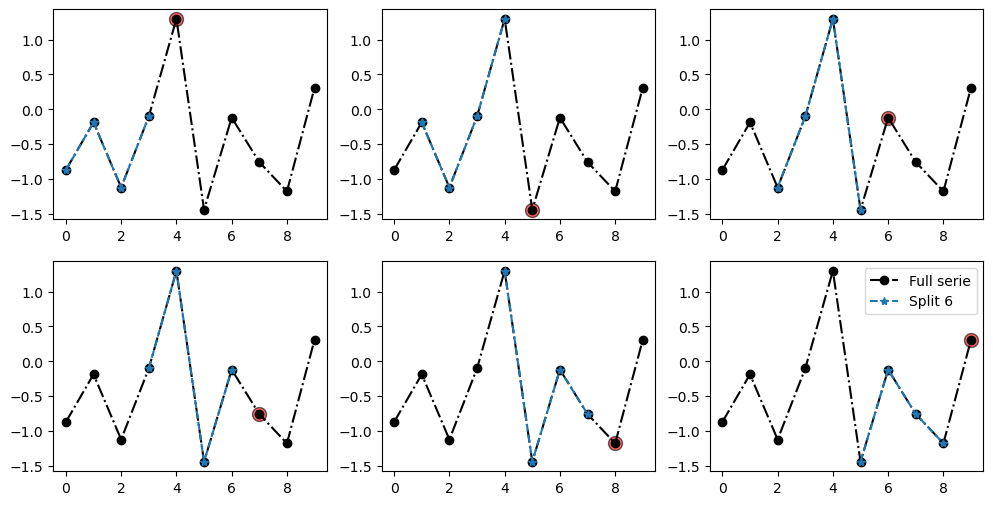

In [440]:
ts_windower.plot_splits(X_randn, X_window, y_window)

## Visualization

Visualize the full time series and each one of its splits.

In [389]:
X_randn.shape, X_window.shape, y_window.shape

((6, 1, 10), (6, 6, 1, 4), (6, 6, 1, 1))

In [390]:
X_randn

array([[[-0.86364379,  1.79287627,  1.23590286,  1.6643416 ,
         -0.32813426, -0.02137299, -0.78666576,  1.96600745,
          0.30131643, -1.29751651]],

       [[ 2.22381182,  0.93389405,  0.97754957, -1.58033238,
         -0.04640417,  0.35301176, -0.78408637,  0.29220893,
         -0.90330036,  0.5944597 ]],

       [[-0.52572042,  1.36102969,  0.85300298,  0.77087665,
          1.31761939, -1.44030838, -0.92023731, -0.58272579,
         -0.71599668,  1.31817701]],

       [[ 0.69321314, -0.35715241, -1.73317644, -1.03815671,
          0.37390458,  0.32863978, -0.94623701,  1.08363554,
         -0.39424848, -1.40550955]],

       [[-0.96585315, -0.97756224,  0.50127533,  1.67284033,
          1.59914695,  1.31870036,  2.54326986, -0.34238378,
         -0.31075278, -0.72780188]],

       [[-0.14722806,  0.73968633, -0.11677249, -1.16415596,
         -0.94258046, -0.46393092, -1.13103215, -0.64828568,
          1.0614554 , -1.00959992]]])

In [391]:
X_window[0]

array([[[-0.86364379,  1.79287627,  1.23590286,  1.6643416 ]],

       [[ 1.79287627,  1.23590286,  1.6643416 , -0.32813426]],

       [[ 1.23590286,  1.6643416 , -0.32813426, -0.02137299]],

       [[ 1.6643416 , -0.32813426, -0.02137299, -0.78666576]],

       [[-0.32813426, -0.02137299, -0.78666576,  1.96600745]],

       [[-0.02137299, -0.78666576,  1.96600745,  0.30131643]]])

In [392]:
y_window[0]

array([[[-0.32813426]],

       [[-0.02137299]],

       [[-0.78666576]],

       [[ 1.96600745]],

       [[ 0.30131643]],

       [[-1.29751651]]])

Sample ts: (6, 4), outputs: (6, 1)
Step: 1
Indices: [0 1 2 3] [4] . Data: [ 2.22381182  0.93389405  0.97754957 -1.58033238] [-0.04640417]
Step: 2
Indices: [1 2 3 4] [5] . Data: [ 0.93389405  0.97754957 -1.58033238 -0.04640417] [0.35301176]
Step: 3
Indices: [2 3 4 5] [6] . Data: [ 0.97754957 -1.58033238 -0.04640417  0.35301176] [-0.78408637]
Step: 4
Indices: [3 4 5 6] [7] . Data: [-1.58033238 -0.04640417  0.35301176 -0.78408637] [0.29220893]
Step: 5
Indices: [4 5 6 7] [8] . Data: [-0.04640417  0.35301176 -0.78408637  0.29220893] [-0.90330036]
Step: 6
Indices: [5 6 7 8] [9] . Data: [ 0.35301176 -0.78408637  0.29220893 -0.90330036] [0.5944597]


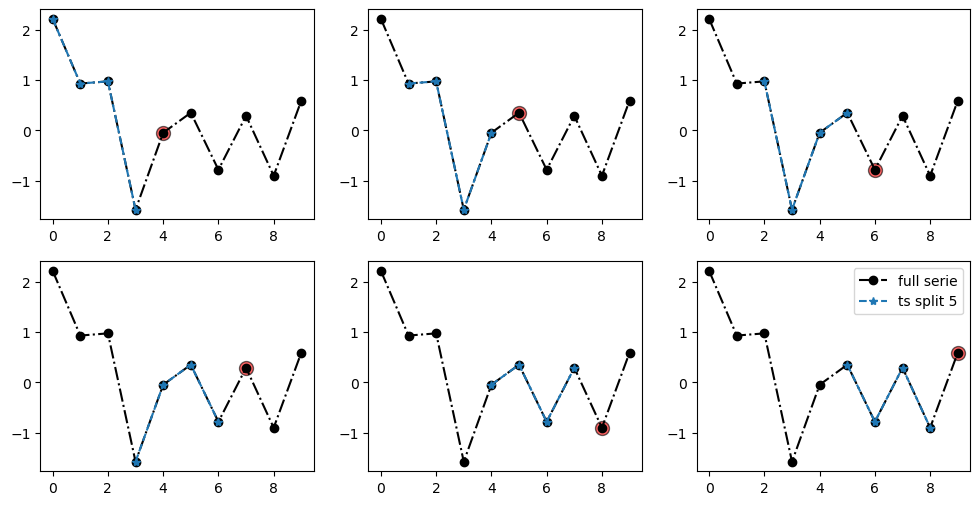

In [393]:
batch_idx = 1
feature = 0

# Full data plot parameters
linestyle_full_data = "-."
marker_full_data = "o"
size_full_data = 25
# Split data plot parameters
linestyle_split_data = "--"
marker_split_data = "*"
# Target plot parameters
size = 100
alpha = 0.6
target_marker = "o"
target_facecolor = "red"
target_edgecolor = "black"

sample_ts = X_randn[batch_idx, feature]
sample_ts_splits = X_window[batch_idx, :, feature]
sample_output_split = y_window[batch_idx, :, feature]
print(f"Sample ts: {sample_ts_splits.shape}, outputs: {sample_output_split.shape}")
"""plt.plot(sample_ts, 
         color="black", 
         marker=marker_full_data,
         markersize=size_full_data,
         linestyle=linestyle_full_data, 
         label="full serie")"""

n_splits = len(sample_ts_splits)
if n_splits % 5 == 0:
    axes_rows, axes_cols = n_splits // 5, 5
elif n_splits % 4 == 0:
    axes_rows, axes_cols = n_splits // 4, 4
elif n_splits % 3 == 0:
    axes_rows, axes_cols = n_splits // 3, 3
elif n_splits % 2 == 0:
    axes_rows, axes_cols = n_splits // 2, 2
else:
    axes_rows, axes_cols = n_splits, 1
plt.figure(figsize=(12, 6))
    
for i, (sample_ts_split, index) in enumerate(zip(sample_ts_splits, start_indices)):
    print("Step:", i + 1)
    
    # Next target points
    x_data = np.arange(index, index + w)
    x_target = np.arange(index + w + g, index + w + g + n_outputs)
    ts_target_split = y_window[batch_idx, i, feature]
    
    print("Indices:", x_data, x_target, ". Data:", sample_ts_split, ts_target_split)
    
    plt.subplot(axes_rows, axes_cols, i + 1)
    # Plot full time serie
    plt.plot(sample_ts, 
             color="black", 
             marker=marker_full_data,
             linestyle=linestyle_full_data, 
             label="full serie")
    # Plot split time serie
    plt.plot(x_data, 
                  sample_ts_split, 
                  marker=marker_split_data, 
                  linestyle=linestyle_split_data,
                  label=f"ts split {i}"
                 )
    
    # Plot target points
    plt.scatter(x_target, ts_target_split, 
                marker=target_marker, 
                alpha=alpha, 
                s=size, 
                facecolor=target_facecolor, 
                edgecolor=target_edgecolor)
plt.legend()

Test import of Windowing